<a href="https://colab.research.google.com/github/bxs-machine-learning-club/ANN_Mini_Projects/blob/master/ph_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A 'Basic' Deep Learning Application
This applies deep learning to predict the type of pH given the color of the pH paper found. Credits to **Tajwar Rahman** for showing me where he found his data and his preprocessing.

™ ℠ Michael Batavia (ML Club) 2020

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.initializers import he_normal
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

## Preprocessing
Looking at the data and removing all **null** values within it. Preparation for the model.

In [0]:
df = pd.read_csv('ph-data.csv')

In [0]:
df.isnull().sum()

blue     0
green    0
red      0
label    0
dtype: int64

In [0]:
df

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
...,...,...,...,...
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13


In [0]:
x_train = df.drop(['label'], axis = 1)
y_train = to_categorical(df['label'])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)
x_train.shape

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test)

## Building The Model
Standard Sequential Model

In [0]:
model = Sequential([
    Dense(16, input_shape = (3,), bias_initializer="zeros", kernel_initializer=he_normal(42),
          kernel_regularizer=l2()),
    Activation('relu'),
    Dense(32, kernel_regularizer=l2()),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2()),
    Activation('relu'),
    Dropout(.4),
    Dense(128, kernel_regularizer=l2()),
    Activation('relu'),
    Dense(15, kernel_regularizer=l2()),
    Activation('softmax')
])

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 16)                64        
_________________________________________________________________
activation_146 (Activation)  (None, 16)                0         
_________________________________________________________________
dense_148 (Dense)            (None, 32)                544       
_________________________________________________________________
activation_147 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_149 (Dense)            (None, 64)                2112      
_________________________________________________________________
activation_148 (Activation)  (None, 64)                0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)              

In [0]:
callbacks = []
callbacks.append(EarlyStopping('val_acc', patience=50, restore_best_weights=True))
callbacks.append(ModelCheckpoint("best-weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, period=10))

In [0]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
h = model.fit(x_train, y_train, epochs = 500, batch_size = 32, validation_data=(x_val, y_val), callbacks=callbacks)

Train on 489 samples, validate on 41 samples
Epoch 1/500
489/489 [==============================] - 3s 6ms/step - loss: 16.6008 - acc: 0.0716 - val_loss: 16.7647 - val_acc: 0.0732
Epoch 2/500
489/489 [==============================] - 0s 104us/step - loss: 15.4961 - acc: 0.1227 - val_loss: 14.7196 - val_acc: 0.1220
Epoch 3/500
489/489 [==============================] - 0s 76us/step - loss: 14.9786 - acc: 0.1452 - val_loss: 15.8104 - val_acc: 0.1220
Epoch 4/500
489/489 [==============================] - 0s 81us/step - loss: 14.1758 - acc: 0.2045 - val_loss: 15.7323 - val_acc: 0.1220
Epoch 5/500
489/489 [==============================] - 0s 70us/step - loss: 14.3172 - acc: 0.1861 - val_loss: 15.6695 - val_acc: 0.1220
Epoch 6/500
489/489 [==============================] - 0s 84us/step - loss: 14.0561 - acc: 0.1984 - val_loss: 15.6197 - val_acc: 0.1220
Epoch 7/500
489/489 [==============================] - 0s 71us/step - loss: 13.7061 - acc: 0.2025 - val_loss: 13.5974 - val_acc: 0.2439
Epo

In [0]:
print (h.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy UNTRAINED: {h.history['val_acc'][-1]:.02f}")
print(f"Final Loss on Testing Data UNTRAINED: {accuracy[0]:02f}")
print(f"Final Untrained Test ACCURACY: {accuracy[1]:02f}")

123/123 [==============================] - 0s 106us/step
Validation Accuracy UNTRAINED: 0.59
Final Loss on Testing Data UNTRAINED: 2.083742
Final Untrained Test ACCURACY: 0.634146


In [0]:
model.load_weights("best-weights.hdf5")
accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy UNTRAINED: {h.history['val_acc'][-1]:.02f}")
print(f"Final Loss on Testing Data TRAINED: {accuracy[0]:02f}")
print(f"Final Trained Test ACCURACY: {accuracy[1]:02f}")

123/123 [==============================] - 0s 62us/step
Validation Accuracy UNTRAINED: 0.59
Final Loss on Testing Data TRAINED: 2.060259
Final Trained Test ACCURACY: 0.617886


## Graphs
The first is of accuracy vs time and the other is of loss vs. time.

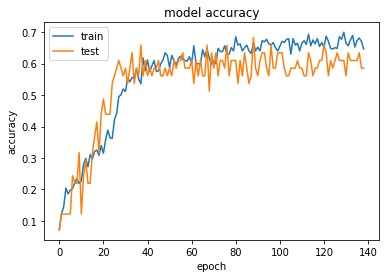

In [0]:
##ACCURACY GRAPH
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

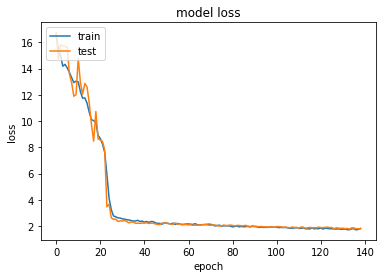

In [0]:
##LOSS GRAPH
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()